In [1]:
import tensorflow as tf
#import Homogeneous_Poisson_NN
from Homogeneous_Poisson_NN import Homogeneous_Poisson_NN_2#,Homogeneous_Poisson_NN
from Lp_integral_norm import Lp_integral_norm
from generate_cholesky_soln import generate_dataset
from generate_analytical_soln import generate_analytical_solution_homogeneous_bc
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.set_floatx('float64')

In [2]:
mod = Homogeneous_Poisson_NN(data_format = 'channels_first')
mod(tf.random.uniform((1,1,74,83), dtype = tf.keras.backend.floatx()))
mod.load_weights('Homogeneous_Poisson_NN.h5')

In [ ]:
def dataset_generator(n_batches = 60, dx = 0.1*(np.random.rand() + 0.01), nx = 64, ny = 64):
    #dx = 
#     nx = np.random.randint(64,128)
#     ny = np.random.randint(64,128)
#     if np.random.rand() > 0.5:
#         nx = 64
#     else:
#         nx = 64
        
#     if np.random.rand() > 0.5:
#         ny = 64
#     else:
#         ny = 64
    batch_size = 125
    for n in range(n_batches):
        if np.random.rand() > 0.5:
            yield tuple(reversed(generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims = True)))
        else:
            yield tuple(reversed(generate_dataset(batch_size, [nx,ny], dx, {'top':np.zeros(nx),'bottom':np.zeros(nx),'left':np.zeros(ny),'right':np.zeros(ny)})))


In [2]:
mod = Homogeneous_Poisson_NN_2(data_format = 'channels_first', mae_component_weight = 1.0)
mod((tf.random.uniform((10,1,74,83), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1), dtype = tf.keras.backend.floatx())))
from IPython.display import clear_output
clear_output()
#mod.load_weights('Homogeneous_Poisson_NN_2.h5')

In [3]:
def dataset_generator_2(n_batches = 60, dx = 0.1*(np.random.rand() + 0.01), nx = 64, ny = 64):
    #dx = 
#     nx = np.random.randint(64,128)
#     ny = np.random.randint(64,128)
#     if np.random.rand() > 0.5:
#         nx = 64
#     else:
#         nx = 64
        
#     if np.random.rand() > 0.5:
#         ny = 64
#     else:
#         ny = 64
    batch_size = 125
    while True:
        if np.random.rand() > 0.5:
            soln, rhs = generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims = True)
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)
        else:
            soln, rhs = generate_dataset(batch_size, [nx,ny], dx, {'top':np.zeros(nx),'bottom':np.zeros(nx),'left':np.zeros(ny),'right':np.zeros(ny)})
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)
def dataset_generator_2_rbg():
    batch_size = 75
    while True:
#         nx = np.random.randint(64,128)
#         ny = np.random.randint(64,128)
        if np.random.rand() > 0.5:
            nx = 64
        else:
            nx = 64

        if np.random.rand() > 0.5:
            ny = 64
        else:
            ny = 64
        dx = 0.1*(np.random.rand() + 0.01)
        if np.random.rand() > 0.5:
            soln, rhs = generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims = True)
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)
        else:
            soln, rhs = generate_dataset(batch_size, [nx,ny], dx, {'top':np.zeros(nx),'bottom':np.zeros(nx),'left':np.zeros(ny),'right':np.zeros(ny)})
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)


In [4]:
from IPython.display import clear_output
i = 0
initial_epoch = 0
mod.compile(loss = mod.integral_loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), metrics = ['mse', 'mae'])
mod.run_eagerly = True
mod.fit_generator(generator=dataset_generator_2_rbg(), steps_per_epoch=60, epochs=50, validation_data=dataset_generator_2_rbg(), validation_steps=3)
#maybe incorporate delta x and domain size information? via [dx, dy, Lx, Ly] -> dense layers -> einsum into conv filters

Epoch 1/50
60/60 [==============================] - 78s 1s/step - loss: 0.8998 - mse: 0.0535 - mae: 0.1204 - val_loss: 0.5849 - val_mse: 0.0157 - val_mae: 0.0834
Epoch 2/50
60/60 [==============================] - 69s 1s/step - loss: 0.8909 - mse: 0.0521 - mae: 0.1391 - val_loss: 0.2832 - val_mse: 0.0094 - val_mae: 0.0836
Epoch 3/50
60/60 [==============================] - 65s 1s/step - loss: 0.7574 - mse: 0.0503 - mae: 0.1570 - val_loss: 1.8222 - val_mse: 0.1221 - val_mae: 0.2331
Epoch 4/50
60/60 [==============================] - 68s 1s/step - loss: 0.7685 - mse: 0.0395 - mae: 0.1226 - val_loss: 0.5131 - val_mse: 0.0167 - val_mae: 0.0882
Epoch 5/50
60/60 [==============================] - 71s 1s/step - loss: 0.5965 - mse: 0.0260 - mae: 0.1096 - val_loss: 1.2541 - val_mse: 0.0725 - val_mae: 0.1619
Epoch 6/50
60/60 [==============================] - 78s 1s/step - loss: 0.5573 - mse: 0.0379 - mae: 0.1221 - val_loss: 0.1339 - val_mse: 0.0075 - val_mae: 0.0592
Epoch 7/50
60/60 [==========

KeyboardInterrupt: 

In [12]:
mod.save_weights('Homogeneous_Poisson_NN.h5')

In [8]:
dx = 0.05#0.1*(np.random.rand() + 0.01)
nx = 128#np.random.randint(64,128)
ny = 64#np.random.randint(64,128)
batch_size = 100
soln, rhs = generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims= True)


(128, 64)
(128, 64)


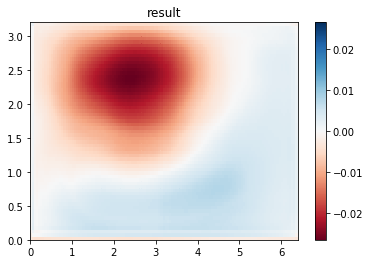

In [28]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
#z = rhs[p_r,...]
print(z.shape)
print(x.shape)
z = mod(rhs)[p_r,0,...]
#z = mod(rhs)[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
from conv_laplacian_loss import conv_laplacian_loss
cll = conv_laplacian_loss((ny,nx), dx)
#cll(tf.expand_dims(rhs, axis = 1), tf.expand_dims(soln, axis = 1))
cll(rhs,soln)

In [100]:
mod.compile(loss = lf, optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5))

In [10]:
mod.dx

<tf.Tensor: id=4314, shape=(10, 1), dtype=float64, numpy=
array([[0.0125162 ],
       [0.01514331],
       [0.01004803],
       [0.02955998],
       [0.02036795],
       [0.02593667],
       [0.09950663],
       [0.02465839],
       [0.0333746 ],
       [0.04933397]])>

In [6]:
r = (tf.random.uniform((100,1,67,96), dtype = tf.float64), 0.05 * tf.ones((100,1), dtype = tf.float64))
s = (tf.random.uniform((100,1,67,96), dtype = tf.float64), 0.05 * tf.ones((100,1), dtype = tf.float64))
Lp_integral_norm_batch(r,s)

<tf.Tensor: id=72203, shape=(), dtype=float64, numpy=2.72116787741319>

In [105]:
from importlib import reload
reload(Homogeneous_Poisson_NN)
mod = Homogeneous_Poisson_NN.Homogeneous_Poisson_NN_2(data_format = 'channels_first', Lp_norm_power=2)
nx1 = 100
nx2 = 100
dx = 0.01
Lx1 = 1.0
Lx2 = 1.0
batch_size = 1
mod((tf.random.uniform((10,1,74,83), dtype = tf.keras.backend.floatx()), dx*tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())))
from IPython.display import clear_output
clear_output()
x = np.array(np.meshgrid(np.linspace(0, Lx1, nx1),np.linspace(0, Lx2, nx2),indexing = 'xy'), dtype = np.float64).transpose((1,2,0))
y = np.sin(x[:,:,0] - x[:,:,1])
mod.integral_loss_2(y, tf.zeros((batch_size,1,nx1,nx2), dtype = tf.float64)) #ttf.ones((batch_size,1,nx1,nx2), dtype = tf.float64)

(1, 2)
---data---
(1, 1, 100, 100)
---index combinations---
(20, 20, 4, 2)
---interp_pts---
(20, 20, 4, 1)
---quadweights---
tf.Tensor(
[[7.75633119e-05 1.78788469e-04 2.75976477e-04 3.66709280e-04
  4.48849465e-04 5.20469832e-04 5.79891154e-04 6.25720471e-04
  6.56883512e-04 6.72649813e-04 6.72649813e-04 6.56883512e-04
  6.25720471e-04 5.79891154e-04 5.20469832e-04 4.48849465e-04
  3.66709280e-04 2.75976477e-04 1.78788469e-04 7.75633119e-05]
 [1.78788469e-04 4.12119025e-04 6.36143693e-04 8.45288694e-04
  1.03462715e-03 1.19971675e-03 1.33668675e-03 1.44232630e-03
  1.51415913e-03 1.55050148e-03 1.55050148e-03 1.51415913e-03
  1.44232630e-03 1.33668675e-03 1.19971675e-03 1.03462715e-03
  8.45288694e-04 6.36143693e-04 4.12119025e-04 1.78788469e-04]
 [2.75976477e-04 6.36143693e-04 9.81946411e-04 1.30478099e-03
  1.59704235e-03 1.85187335e-03 2.06329918e-03 2.22636356e-03
  2.33724415e-03 2.39334192e-03 2.39334192e-03 2.33724415e-03
  2.22636356e-03 2.06329918e-03 1.85187335e-03 1.5970423

<tf.Tensor: id=946104, shape=(), dtype=float64, numpy=0.38204612888195494>

(100, 100)

In [104]:
lf = Lp_integral_norm([nx1,nx2], [0,Lx1,0,Lx2], n_quadpts=20, p = 2.0)
lf(y, tf.zeros((1,1,nx1,nx2), dtype = tf.float64))

[0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]
[0.5 0.5]
---data---
(100, 100, 1, 1)
---index combinations---
(20, 20, 4, 2)
---quadweights---
tf.Tensor(
[[7.75633119e-05 1.78788469e-04 2.75976477e-04 3.66709280e-04
  4.48849465e-04 5.20469832e-04 5.79891154e-04 6.25720471e-04
  6.56883512e-04 6.72649813e-04 6.72649813e-04 6.56883512e-04
  6.25720471e-04 5.79891154e-04 5.20469832e-04 4.48849465e-04
  3.66709280e-04 2.75976477e-04 1.78788469e-04 7.75633119e-05]
 [1.78788469e-04 4.12119025e-04 6.36143693e-04 8.45288694e-04
  1.03462715e-03 1.19971675e-03 1.33668675e-03 1.44232630e-03
  1.51415913e-03 1.55050148e-03 1.55050148e-03 1.51415913e-03
  1.44232630e-03 1.33668675e-03 1.19971675e-03 1.03462715e-03
  8.45288694e-04 6.36143693e-04 4.12119025e-04 1.78788469e-04]
 [2.75976477e-04 6.36143693e-04 9.81946411e-04

<tf.Tensor: id=929183, shape=(), dtype=float64, numpy=0.3820461288819584>

In [93]:
import itertools
def Lp_integral_norm(image_size, domain, n_quadpts = 10, quadpts_randomization = 0, p=2, mse_component_weight = 0.0):
    '''
    This function generates a function that takes 2 function(s) evaluated on a 2D grid, the dimensions of which are stored in image_size, on a rectangular domain and evaluates the Lp norm of their difference using Gauss-Legendre quadrature
    
    image_size              :     tuple with 2 elements.
    domain                  :     tuple with 4 elements containing (xmin,xmax,ymin,ymax)
    n_quadpts               :     no of GL quadrature points
    quadpts_randomization   :     if set to a nonzero value, the dataset inputted to the generated func. will be split into 2*quadpts_randomization+1 pieces and the integral for the ith piece will be computed with n_quadpts + i * quadpts_randomization GL pts (where i = [n_quadpts-quadpts_randomization, n_quadpts+quadpts_randomization])
    p                       :     order of the Lp norm
    
    The shape of the inputs to the generated function must be (batch_size,channels,image_size[0],image_size[1])
    
    User inputs to the closure (generated function):
    y_true                  :     labels
    y_pred                  :     images
    
    '''
    #match data types with keras
    if tf.keras.backend.floatx() == 'float64':
        dtype = tf.float64
    elif tf.keras.backend.floatx() == 'float32':
        dtype = tf.float32
    else:
        dtype = tf.float16
    
    #arrays to store values for different # of GL quad. pts. in accordance with quadpts_randomization. length of each: 2 * quadpts_randomization + 1
    interpolation_weights = [] #array that stores weights b_ii such that the interpolated value at x,y is b_ii*f(X_i, Y_j) within a rectangle bounded by [X_1,X_2] x [Y_1, Y_2] (shapes: (n_quadpts, n_quadpts, 4, 2))
    quadweights_list = [] #array that stores GL quad weights (shapes: (n_quadpts, n_quadpts))
    index_combinations_list = [] #array of tensors, where each tensor stores the indices for the 4 points between which every GL quad pt lies (shapes: (no of quadpts, no of quadpts, 4, 2))
    coords = np.array(np.meshgrid(np.linspace(domain[0], domain[1], image_size[0]),np.linspace(domain[2], domain[3], image_size[1]),indexing = 'xy'), dtype = np.float64).transpose((1,2,0)) #coordinates of each grid pt in the domain
    image_coords = [coords[0,:,0], coords[:,1,1]] #x and y coordinates separately
    c = np.array([np.array(0.5*(domain[1] - domain[0]),dtype=np.float64),np.array(0.5*(domain[3] - domain[2]),dtype=np.float64)]) #scaling coefficients - for handling domains other than [-1,1] x [-1,1]
    d = np.array([np.array(0.5*(domain[1] + domain[0]),dtype=np.float64),np.array(0.5*(domain[3] + domain[2]),dtype=np.float64)])
    for n in range(n_quadpts - quadpts_randomization, n_quadpts + quadpts_randomization+1): #loop over no of quadpts
        quadrature_x, quadrature_w = tuple([np.polynomial.legendre.leggauss(n)[i].astype(np.float64) for i in range(2)]) #quadrature weights and points
        print(quadrature_w)
        quadpts = tf.constant(np.apply_along_axis(lambda x: x + d, 0, np.einsum('ijk,i->ijk',np.array(np.meshgrid(quadrature_x,quadrature_x,indexing = 'xy')),c)).transpose((1,2,0)),dtype = tf.float64)
        #quadweights = tf.reduce_prod(c)*tf.tensordot(tf.squeeze(quadrature_w),tf.squeeze(quadrature_w),axes = 0)
        quadweights = tf.reduce_prod(c) * tf.einsum('i,j->ij',tf.squeeze(quadrature_w),tf.squeeze(quadrature_w))
        indices = [[],[]] #indices between each quadrature point lies - indices[0] is in x-dir and indices[1] is in the y-dir
        quad_coords = [quadpts[0,:,0], quadpts[:,1,1]] #x and y coordinates of each quad pt respectively
        #find the indices of coords between which every quad. pt. lies
        for i in range(len(indices)):
            j=0
            #does not work if more than 2 quad pts fall within 1 cell - fix later
            while len(indices[i]) < quadpts.shape[0] and j<image_coords[i].shape[0]:
                try:
                    if abs(float(quad_coords[i][len(indices[i])] - image_coords[i][j])) == float(min(abs(quad_coords[i][len(indices[i])] - image_coords[i][j-1]), abs(quad_coords[i][len(indices[i])] - image_coords[i][j]), abs(quad_coords[i][len(indices[i])] - image_coords[i][j+1]))):
                        if quad_coords[i][len(indices[i])] - image_coords[i][j] < 0:
                            indices[i].append((j-1,j))
                        else:
                            indices[i].append((j,j+1))
                except:
                    if abs(float(quad_coords[i][len(indices[i])] - image_coords[i][j])) == float(min(abs(quad_coords[i][len(indices[i])] - image_coords[i][j-1]), abs(quad_coords[i][len(indices[i])] - image_coords[i][j]))):
                        indices[i].append((j-1,j))
                j+=1
        
        index_combinations = np.zeros((quadpts.shape[0], quadpts.shape[1], 4 , 2), dtype = np.int32) #array storing the 4 index combinations on the original grid which surround each quad. pt.
        corners = np.zeros((quadpts.shape[0], quadpts.shape[1], 2 , 2), dtype = np.int32) #array storing the lower left corner and the upper right corner of each box stored in index_combinations. effectively this will contain [[xmin,ymin],[xmax,ymax]] for the rectangle around each quad pt.
        s=np.array(indices)
        for i in range(n):
            for j in range(n):
                index_combinations[i,j,:,:] = np.array(list(itertools.product(np.array(s)[0,i,:],np.array(s)[1,j,:])))
        for i in range(n):
            for j in range(n):
                corners[i,j,:,:] = np.array([s[0,i,:],s[1,j,:]])
        corners = corners.transpose((0,1,3,2))
        corner_coords = tf.gather_nd(tf.transpose(coords,(1,0,2)),corners)
        
        #compute the coefficients [b_11,b_12,b_21,b_22]
        #steps:
        #1. compute transpose(invert(array([[1,xmin,ymin,xmin*ymin],[1,xmin,ymax,xmin*ymax],[1,xmax,ymin,xmax*ymin],[1,xmax,ymax,xmax*ymax]]))) for the rectangle around each quad pt.
        #2. compute array([1,x_quadpt, y_quadpt, x_quadpt*y_quadpt]) for each quadpt
        #3. multiply the result of 1 and 2 for each quad pt.
        interpolation_matrix = np.ones((n,n,4,4))
        interpolation_matrix[:,:,0:2,1] = np.einsum('ijk,ij->ijk',interpolation_matrix[:,:,0:2,1],corner_coords[:,:,0,0])
        interpolation_matrix[:,:,2:,1] = np.einsum('ijk,ij->ijk',interpolation_matrix[:,:,2:,1],corner_coords[:,:,1,0])
        interpolation_matrix[:,:,(0,2),2] = np.einsum('ijk,ij->ijk',interpolation_matrix[:,:,(0,2),2],corner_coords[:,:,0,1])
        interpolation_matrix[:,:,(1,3),2] = np.einsum('ijk,ij->ijk',interpolation_matrix[:,:,(1,3),2], corner_coords[:,:,1,1])
        interpolation_matrix[:,:,:,3] *= np.multiply(interpolation_matrix[:,:,:,1], interpolation_matrix[:,:,:,2])
        interpolation_matrix = tf.transpose(tf.linalg.inv(interpolation_matrix), (0,1,3,2))
        q = np.ones((n,n,4))
        q[:,:,1] = tf.transpose(quadpts[:,:,0])
        q[:,:,2] = tf.transpose(quadpts[:,:,1])
        q[:,:,3] = np.multiply(q[:,:,1],q[:,:,2])
        
        b = tf.einsum('ijkl, ijl->ijk', tf.constant(interpolation_matrix), tf.constant(q))
        
        #store results for the closure
        quadweights_list.append(tf.cast(quadweights,dtype))
        index_combinations_list.append(index_combinations)
        interpolation_weights.append(tf.cast(b, dtype))
    print(c)
    if int(tf.__version__[0]) < 2:
        @tf.contrib.eager.defun
        def Lp_integrate_batch(inp):
            '''
            Helper function to facilitate quad pt randomization

            Given the bilinear interp. weights b, GL quad. weights w, Lp norm order p and the indices bounding each quad pt ind, computes the Lp norm for each channel/batch element
            '''
            #unpack values
            data = tf.transpose(inp[0], (2,3,1,0))
            b = inp[1]
            w = inp[2]
            ind = inp[3]
            p = inp[4]

            #get the points from the image to perform interpolation on
            interp_pts = tf.squeeze(tf.gather_nd(data, ind))

            #multiply image values with the weights b ti interpolate original image onto the GL quadrature points
            if data.shape[-1] == 1: #needed to handle if batch dimension is 1
                interp_pts = tf.expand_dims(interp_pts, axis = 3)
            values_at_quad_pts = tf.einsum('ijkl, ijk->ijl', interp_pts, b)

            #compute Lp norm
            return tf.pow(tf.reduce_sum(tf.einsum('ij,ijk->ijk',w,tf.pow(values_at_quad_pts, p)), axis = (0,1)), 1/p)

        @tf.contrib.eager.defun
        def Lp_integrate(y_true,y_pred, b=interpolation_weights, w=quadweights_list, ind=index_combinations_list, p=p, mse_component_weight = mse_component_weight):
            '''
            Split the batch, pack with the appropriate parameters and obtain the integrals
            '''
            if mse_component_weight == 0.0:
                return tf.reduce_mean(tf.concat(list(map(Lp_integrate_batch, zip(tf.split(y_true-y_pred, len(b)), itertools.cycle(b), itertools.cycle(w), itertools.cycle(ind), itertools.repeat(p)))), 0))
            else:
                return tf.reduce_mean(mse_component_weight * tf.keras.losses.mean_squared_error(y_true,y_pred)) + tf.reduce_mean(tf.concat(list(map(Lp_integrate_batch, zip(tf.split(y_true-y_pred, len(b)), itertools.cycle(b), itertools.cycle(w), itertools.cycle(ind), itertools.repeat(p)))), 0))
    
    else:
        #@tf.function
        def Lp_integrate_batch(inp):
            '''
            Helper function to facilitate quad pt randomization

            Given the bilinear interp. weights b, GL quad. weights w, Lp norm order p and the indices bounding each quad pt ind, computes the Lp norm for each channel/batch element
            '''
            #unpack values
            data = tf.transpose(inp[0], (2,3,1,0))
            b = inp[1]
            w = inp[2]
            ind = inp[3]
            p = inp[4]
            
            print('---data---')
            print((data).shape)
            print('---index combinations---')
            print(ind.shape)
            print('---quadweights---')
            print(w)
            print('---b---')
            print(b.shape)
            #get the points from the image to perform interpolation on
            interp_pts = tf.squeeze(tf.gather_nd(data, ind))
            
            print('---interp_pts---')
            print(interp_pts.shape)

            if data.shape[-1] == 1: #needed to handle if batch dimension is 1
                interp_pts = tf.expand_dims(interp_pts, axis = 3)
            
            if interp_pts.shape[0] == None:
                interp_pts = tf.random.uniform(list(b.shape) + [100], dtype = tf.keras.backend.floatx())
                
            #multiply image values with the weights b ti interpolate original image onto the GL quadrature points
            values_at_quad_pts = tf.einsum('ijkl, ijk->ijl', interp_pts, b)
            print('---values_at_quad_pts---')
            print(values_at_quad_pts.shape)
    
            #compute Lp norm
            return tf.pow(tf.reduce_sum(tf.einsum('ij,ijk->ijk',w,tf.pow(values_at_quad_pts, p)), axis = (0,1)), 1/p)

        #@tf.function
        def Lp_integrate(y_true,y_pred, b=interpolation_weights, w=quadweights_list, ind=index_combinations_list, p=p, mse_component_weight = mse_component_weight):
            '''
            Split the batch, pack with the appropriate parameters and obtain the integrals
            '''
            if mse_component_weight == 0.0:
                return tf.reduce_mean(tf.concat(list(map(Lp_integrate_batch, zip(tf.split(y_true-y_pred, len(b)), itertools.cycle(b), itertools.cycle(w), itertools.cycle(ind), itertools.repeat(p)))), 0))
            else:
                return tf.reduce_mean(mse_component_weight * tf.keras.losses.mean_squared_error(y_true,y_pred)) + tf.reduce_mean(tf.concat(list(map(Lp_integrate_batch, zip(tf.split(y_true-y_pred, len(b)), itertools.cycle(b), itertools.cycle(w), itertools.cycle(ind), itertools.repeat(p)))), 0))
    return Lp_integrate
    
